# Movie Genre Classification
- **@ Author : Raj Adhikari**
- **CodSoft: ML**
- This notebook explores **Movie Genre Classification** based on provided data

## Import : Data Manupilation Libraries

In [7]:
import pandas as pd
import numpy as np

## Import : Movie Genre Dataset

In [14]:
names = ['ID' , 'Title', 'Genre', 'Description']
movie_df = pd.read_csv('Datasets/Genre Classification Dataset/train_data.txt', sep=':::', engine='python', names=names)

In [16]:
# Checking Movie_df data
movie_df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [18]:
movie_df.iloc[0]['Description']

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

## Dataset Information

In [21]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### Obvervation
- Dataset has 4 columns
- **Dtype** : int64, obj, obj, obj
- **No NULL values**
- **Shape** : (54214,4)

## Data Preprocessing : Duplicate values

In [32]:
movie_df.drop_duplicates(subset=['Genre','Description'], keep='first', inplace=True)

In [34]:
movie_df.shape

(54105, 4)

### Observation
- Apporx 109 duplicate rows detected  ( from 54214 to 54104 )

## EDA : Checking Genre Distribution

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Top 10 Genre
top_genre = movie_df['Genre'].value_counts()[:10]
genre_movies = movie_df['Genre'].value_counts()

<Axes: xlabel='Genre'>

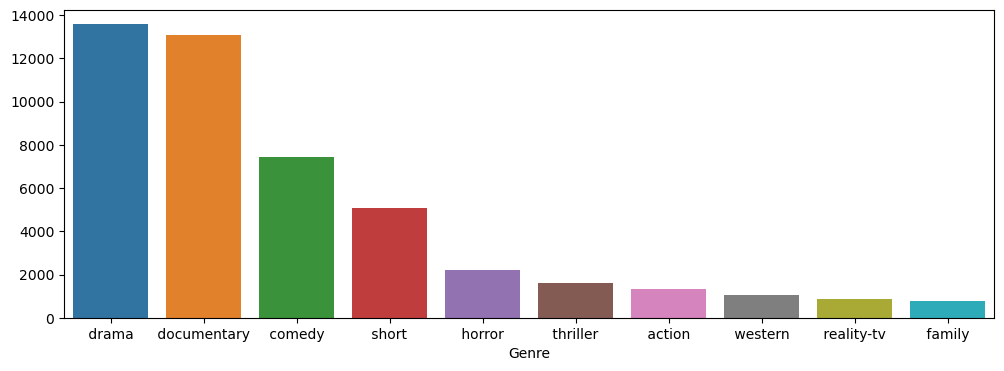

In [82]:
# bar plot
plt.figure(figsize=(12,4))
sns.barplot(x=top_genre.index, y=top_genre.values, hue=top_genre.index)

([<matplotlib.patches.Wedge at 0x1dcc7851610>,
 [Text(0.7754767209560198, 0.7801511746163684, ' drama '),
  Text(-0.7621385338338414, 0.7931865198335147, ' documentary '),
  Text(-1.0192269225215729, -0.4137347947746284, ' comedy '),
  Text(-0.48807431468048507, -0.9857907807182896, ' short '),
  Text(-0.04160211946451524, -1.0992130201448946, ' horror '),
  Text(0.19966620348409428, -1.0817270483750734, ' thriller '),
  Text(0.37837208125261096, -1.032876840735897, ' action '),
  Text(0.5150741881971754, -0.9719560590134828, ' western '),
  Text(0.6197463387109855, -0.9087983690865254, ' reality-tv '),
  Text(0.7042818127885622, -0.844977590339091, ' family '),
  Text(0.7774222107947584, -0.7782125070718091, ' adventure '),
  Text(0.8419231580076199, -0.7079303609893254, ' music '),
  Text(0.8962574949276094, -0.6377479931650797, ' romance '),
  Text(0.9423929985284977, -0.5673582962506737, ' sci-fi '),
  Text(0.9806503070720963, -0.4983221600926488, ' adult '),
  Text(1.0102807202226

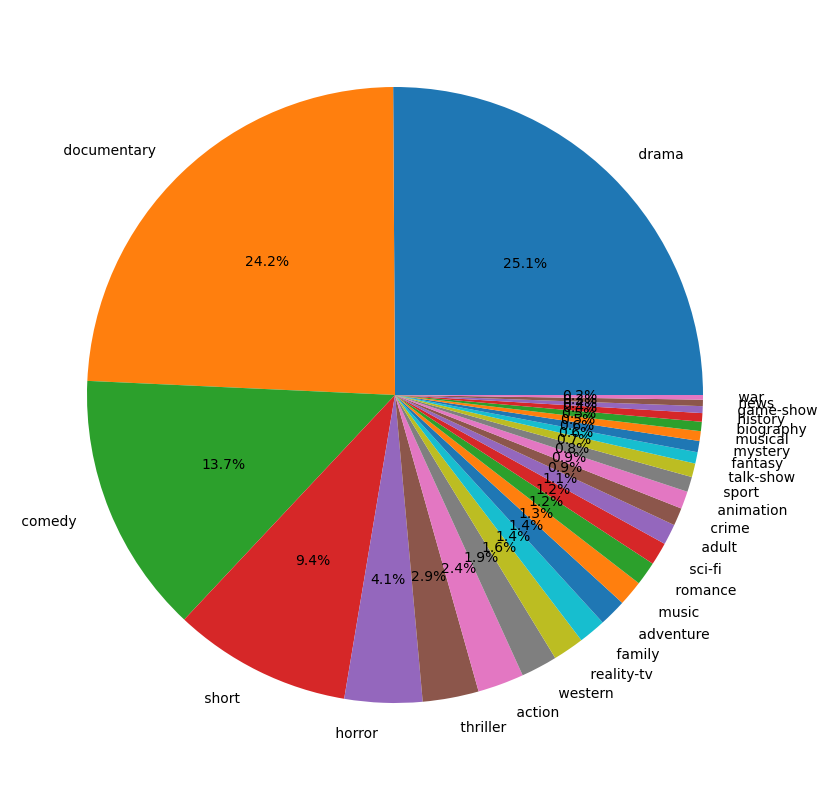

In [92]:
# pie chart
# bar plot
plt.figure(figsize=(20,10))
plt.pie(x=genre_movies.values, labels=genre_movies.index, autopct='%1.1f%%')

## Observations
- Drama, Documemtary account for apporx 50% of Movie Genres in this dataset
- These top 3 genres over 5000 movies each 

## Dataset preperation : Feature Selection

In [99]:
# Checkinng for unique Features

In [101]:
# ID
movie_df['ID'].nunique()

54105

In [105]:
# Movie
movie_df['Title'].nunique()

54105

In [107]:
# Genre
movie_df['Genre'].nunique()

27

In [109]:
# Description
movie_df['Description'].nunique()

54086

### Observations
- **ID** column has all unique value thus No good context to work with
- **Title** column has all unique values but the text may come handy to work with
- **Genre** column is what we'll be predicting
- **Description** column has unique valuest too but description has lots of words to work with thus our input column

## Dataset Split : train, valid, test

In [114]:
movie_df = movie_df.iloc[:, 1:].copy()

In [96]:
from sklearn.model_selection import train_test_split

### Splitting into train and test dataset

In [118]:
train_df, test_df = train_test_split(movie_df, test_size=0.25, random_state=42)

In [120]:
train_df.shape, test_df.shape

((40578, 2), (13527, 2))

### Splitting train into train and validation

In [138]:
X = train_df['Description']
y = train_df['Genre']

In [144]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.20, random_state=42)

### Splitting data into test

In [149]:
X_test = test_df['Description']
y_test = test_df['Genre']

## Data Preprocessing : Custom Function
- This function is responsible for the following :
    - Removing Punctuations
    - Tokenization
    - Stop word removal

In [154]:
import string
from nltk.corpus import stopwords

In [156]:
def text_process(message):

    # 1. Remove punct
    nopunc = ''.join([c for c in message if c not in string.punctuation]).split()

    # 2. Tokenize
    msg_tokens = [str(word).lower() for word in nopunc]

    # 3. Stop words
    msg_tokens = [word for word in msg_tokens if word not in stopwords.words('english')]

    return msg_tokens

## Data Preprocessing : Pipeline
- Creating a Pipeline to automate tasks such as
  - Text Vectorization and Normalization (Using custom Function)
  - Classification algorithms (Naive Bayes, Random Forest, KNN)

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Pipeline: Naive Bayes (Multinomial)

In [250]:
nb_clf = Pipeline(
    [
        ('tfidf', TfidfVectorizer(analyzer=text_process, max_features=3000)),
        ('NB', MultinomialNB())
    ]
)

In [252]:
%%time
# Fitting our train data
nb_clf.fit(X_train, y_train)

CPU times: total: 8min 32s
Wall time: 8min 57s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function text_process at 0x000001DCCCBD7060>,
                                 max_features=3000)),
                ('NB', MultinomialNB())])

In [253]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [254]:
predictions = nb_clf.predict(X_val)

## Results

In [256]:
print(accuracy_score(y_val, predictions))

0.5046821094135042


In [257]:
print(classification_report(y_val, predictions))

               precision    recall  f1-score   support

      action        0.53      0.05      0.09       180
       adult        1.00      0.01      0.02        84
   adventure        0.00      0.00      0.00       125
   animation        0.00      0.00      0.00        99
   biography        0.00      0.00      0.00        39
      comedy        0.52      0.40      0.45      1111
       crime        0.00      0.00      0.00        79
 documentary        0.56      0.89      0.69      1957
       drama        0.43      0.82      0.57      1993
      family        0.00      0.00      0.00       116
     fantasy        0.00      0.00      0.00        66
   game-show        1.00      0.13      0.23        31
     history        0.00      0.00      0.00        39
      horror        0.71      0.28      0.40       344
       music        0.90      0.09      0.16       100
     musical        0.00      0.00      0.00        44
     mystery        0.00      0.00      0.00        53
        n

C:\Users\SArie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SArie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SArie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Pipeline: Support Vector Machine (SVM)

In [259]:
svm_clf = Pipeline(
    [
        ('tfidf', nb_clf.named_steps['tfidf']),
        ('SVM', LinearSVC(dual=True))
    ]
)

In [260]:
%%time
# Fitting our train data
svm_clf.fit(X_train, y_train)

CPU times: total: 8min 32s
Wall time: 9min


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function text_process at 0x000001DCCCBD7060>,
                                 max_features=3000)),
                ('SVM', LinearSVC(dual=True))])

In [261]:
predictions = svm_clf.predict(X_val)

In [262]:
print(classification_report(y_val, predictions))

               precision    recall  f1-score   support

      action        0.36      0.32      0.34       180
       adult        0.47      0.40      0.43        84
   adventure        0.24      0.11      0.15       125
   animation        0.47      0.14      0.22        99
   biography        0.00      0.00      0.00        39
      comedy        0.51      0.53      0.52      1111
       crime        0.21      0.09      0.12        79
 documentary        0.68      0.81      0.74      1957
       drama        0.53      0.68      0.60      1993
      family        0.21      0.10      0.14       116
     fantasy        0.24      0.06      0.10        66
   game-show        0.77      0.55      0.64        31
     history        0.14      0.03      0.04        39
      horror        0.59      0.59      0.59       344
       music        0.48      0.43      0.46       100
     musical        0.25      0.07      0.11        44
     mystery        0.40      0.11      0.18        53
        n

In [263]:
 print(accuracy_score(y_val, predictions))

0.5465746673238048


### Pipeline: K Nearest Neighbours (KNN)

In [265]:
knn_clf = Pipeline(
    [
        ('tfidf', nb_clf.named_steps['tfidf']),
        ('KNN', KNeighborsClassifier(n_neighbors=500))
    ]
)

In [266]:
%%time
# Fitting our train data
knn_clf.fit(X_train, y_train)

CPU times: total: 8min 51s
Wall time: 9min 1s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function text_process at 0x000001DCCCBD7060>,
                                 max_features=3000)),
                ('KNN', KNeighborsClassifier(n_neighbors=500))])

In [267]:
predictions = svm_clf.predict(X_val)

In [268]:
print(classification_report(y_val, predictions))

               precision    recall  f1-score   support

      action        0.36      0.32      0.34       180
       adult        0.47      0.40      0.43        84
   adventure        0.24      0.11      0.15       125
   animation        0.47      0.14      0.22        99
   biography        0.00      0.00      0.00        39
      comedy        0.51      0.53      0.52      1111
       crime        0.21      0.09      0.12        79
 documentary        0.68      0.81      0.74      1957
       drama        0.53      0.68      0.60      1993
      family        0.21      0.10      0.14       116
     fantasy        0.24      0.06      0.10        66
   game-show        0.77      0.55      0.64        31
     history        0.14      0.03      0.04        39
      horror        0.59      0.59      0.59       344
       music        0.48      0.43      0.46       100
     musical        0.25      0.07      0.11        44
     mystery        0.40      0.11      0.18        53
        n

In [269]:
print(accuracy_score(y_val, predictions))

0.5465746673238048


## FINAL Dataset (Train + Val)

In [290]:
X_final = pd.concat((X_train, X_val))
Y_final = pd.concat((y_train, y_val))

In [292]:
# Using SVM

In [313]:
svm_clf.fit(X_final, Y_final)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function text_process at 0x000001DCCCBD7060>,
                                 max_features=3000)),
                ('SVM', LinearSVC(dual=True))])

### Testing on Test Dataset

In [315]:
predictions = svm_clf.predict(X_test)

In [316]:
print(accuracy_score(y_test, predictions))

0.5571819324314334


In [317]:
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

      action        0.32      0.22      0.26       329
       adult        0.47      0.31      0.38       147
   adventure        0.35      0.19      0.25       182
   animation        0.24      0.16      0.19       103
   biography        0.00      0.00      0.00        69
      comedy        0.50      0.55      0.52      1821
       crime        0.16      0.07      0.10       127
 documentary        0.68      0.82      0.74      3305
       drama        0.55      0.71      0.62      3370
      family        0.39      0.14      0.21       190
     fantasy        0.10      0.03      0.04        71
   game-show        0.72      0.66      0.69        47
     history        0.33      0.03      0.05        71
      horror        0.55      0.58      0.56       537
       music        0.61      0.46      0.53       196
     musical        0.21      0.04      0.07        73
     mystery        0.08      0.01      0.02       103
        n

# END 